Note: The entire notebook may take around five minutes to run because the dataset is large. The fit methods will take the longest.

In [ ]:
# Setup The Notebook
%matplotlib inline 
import seaborn as sns
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [15, 10]})
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Connect Drive and Import Packages
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Locate, Upload, Read, and Display Raw CSV Data File 
droughtcsv = "/content/drive/MyDrive/4321 Colab Notebooks/drought.csv"
drought = pd.read_csv(droughtcsv)
drought

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0000
1,1001,2019-01-02,4.94,100.48,8.65,13.05,11.83,11.74,17.76,9.54,8.23,13.06,1.02,1.35,0.32,1.03,2.13,3.37,0.56,2.81,NaN
2,1001,2019-01-03,20.74,100.03,8.59,12.12,11.67,11.67,13.74,10.44,3.30,12.12,1.83,4.23,0.34,3.88,3.41,7.49,0.72,6.77,NaN
3,1001,2019-01-04,16.17,99.47,7.93,11.80,10.38,9.59,18.19,5.44,12.75,11.72,3.75,5.25,2.34,2.91,6.78,9.61,4.90,4.71,NaN
4,1001,2019-01-05,0.01,100.39,5.32,7.91,4.73,4.71,14.37,3.68,10.69,7.75,2.32,2.90,1.69,1.21,4.42,5.87,3.15,2.72,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271943,56043,2020-12-27,3.83,82.91,2.77,-3.61,-6.77,-5.19,0.24,-9.07,9.31,-5.88,2.98,6.04,0.72,5.31,4.56,7.68,1.03,6.66,NaN
2271944,56043,2020-12-28,0.00,83.04,1.82,-7.31,-12.06,-9.68,-1.48,-11.51,10.03,-10.61,1.83,2.81,0.10,2.72,2.52,3.69,0.14,3.56,NaN
2271945,56043,2020-12-29,0.00,82.78,1.87,-7.38,-11.79,-9.59,-0.88,-11.39,10.51,-10.81,2.70,6.22,0.18,6.04,3.84,7.66,0.29,7.37,3.5182
2271946,56043,2020-12-30,0.01,82.87,1.57,-6.40,-13.94,-10.17,1.33,-12.16,13.49,-8.74,2.93,4.10,1.62,2.48,4.42,6.05,2.79,3.26,NaN


In [ ]:
#View and Count All Null Values
drought.isnull().sum() 

fips                 0
date                 0
PRECTOT              0
PS                   0
QV2M                 0
T2M                  0
T2MDEW               0
T2MWET               0
T2M_MAX              0
T2M_MIN              0
T2M_RANGE            0
TS                   0
WS10M                0
WS10M_MAX            0
WS10M_MIN            0
WS10M_RANGE          0
WS50M                0
WS50M_MAX            0
WS50M_MIN            0
WS50M_RANGE          0
score          1945608
dtype: int64

In [ ]:
#Drop All Null Rows and Keep All Rows with 0,1,2,3, and 4 in score
drought_df = drought.dropna()
drought_df = drought_df[drought_df['score'].isin([0,1,2,3,4])]

In [ ]:
#Display Clean Data
drought_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0
7,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0
14,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0
21,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0
28,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271700,56043,2020-04-28,0.33,83.54,3.92,8.74,-2.14,-2.26,14.28,3.06,11.22,9.03,5.04,9.76,1.22,8.54,6.82,11.75,1.66,10.09,0.0
2271735,56043,2020-06-02,0.33,83.48,8.59,18.92,9.00,8.96,24.11,12.46,11.65,20.39,2.47,3.89,1.66,2.23,3.72,7.56,1.85,5.71,1.0
2271749,56043,2020-06-16,1.13,82.50,6.45,17.64,4.57,4.50,26.29,11.10,15.19,17.80,4.59,11.06,1.15,9.92,6.43,13.50,1.97,11.53,2.0
2271756,56043,2020-06-23,0.01,83.48,7.16,20.98,6.23,6.26,29.08,10.99,18.09,23.34,2.11,3.10,1.17,1.93,3.28,6.04,1.22,4.82,2.0


In [ ]:
#Check for Null Values
drought_df.isnull().sum() 

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
#View Information of Data Types 
drought.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2271948 entries, 0 to 2271947
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 364.0+ MB


In [ ]:
#Description for Every Column
drought_df.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.000000,243071.00000,243071.000000,243071.000000,243071.000000,243071.000000
mean,30499.361771,2.907717,97.389248,8.152661,12.036261,7.608797,7.622283,17.431350,7.033657,10.397711,12.044944,3.497400,5.105549,1.885445,3.220112,5.47669,7.740827,3.092292,4.648527,0.132122
std,14713.320091,6.453292,4.522509,4.990125,10.942405,10.541229,10.310674,11.461705,10.761917,3.665011,11.043068,1.784419,2.546824,1.276018,1.926336,2.20070,2.736267,2.029466,2.145810,0.495439
min,1001.000000,0.000000,67.270000,0.150000,-34.690000,-37.840000,-34.830000,-28.350000,-41.960000,0.180000,-35.770000,0.400000,0.710000,0.000000,0.260000,0.70000,1.270000,0.000000,0.530000,0.000000
25%,19085.000000,0.010000,96.650000,3.880000,3.640000,-0.300000,-0.250000,8.910000,-1.060000,7.820000,3.580000,2.100000,3.070000,0.970000,1.770000,3.82000,5.670000,1.490000,3.120000,0.000000
50%,29109.000000,0.230000,98.500000,6.950000,13.010000,8.080000,7.910000,18.960000,7.350000,10.280000,12.950000,3.130000,4.620000,1.640000,2.750000,5.14000,7.270000,2.770000,4.210000,0.000000
75%,45007.000000,2.750000,100.040000,12.110000,21.310000,16.755000,16.610000,26.880000,15.950000,12.870000,21.390000,4.500000,6.660000,2.520000,4.210000,6.79000,9.380000,4.350000,5.720000,0.000000
max,56043.000000,147.560000,103.790000,21.800000,38.700000,26.710000,26.620000,46.520000,31.380000,26.180000,41.700000,16.080000,23.860000,14.180000,19.110000,18.93000,28.740000,17.010000,22.850000,4.000000


In [ ]:
#Output the Numbers of score for the Drought Severity
drought_df.score.value_counts()

0.0    222634
1.0     12196
2.0      5585
3.0      1875
4.0       781
Name: score, dtype: int64

In [ ]:
#Create New Column to Determine if there is a Drought or Not by the score of the Drought Severity
drought_df['drought'] = [ 1 if x >= 1 else 0 for x in drought_df['score']]

In [ ]:
#Display Clean Data
drought_df

,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,drought
0,1001,2019-01-01,2.25,100.51,9.69,14.71,13.55,13.52,17.38,10.92,6.46,14.63,1.20,1.50,0.79,0.71,2.74,4.01,1.23,2.78,0.0,0
7,1001,2019-01-08,0.05,100.57,8.75,13.15,12.01,11.98,20.04,9.36,10.68,13.05,2.33,3.40,1.68,1.72,5.13,6.51,3.67,2.85,0.0,0
14,1001,2019-01-15,0.00,101.07,4.04,3.91,0.94,0.96,9.40,1.02,8.38,3.91,1.73,2.40,1.36,1.04,3.28,4.13,2.39,1.75,0.0,0
21,1001,2019-01-22,0.03,101.14,4.96,6.03,3.81,3.08,12.43,-1.63,14.06,6.08,3.68,4.57,2.49,2.07,6.65,8.56,5.01,3.55,0.0,0
28,1001,2019-01-29,5.79,100.36,3.69,2.23,-0.41,-1.03,7.33,-5.19,12.52,2.18,3.10,4.52,1.71,2.81,5.62,6.96,3.60,3.35,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2271700,56043,2020-04-28,0.33,83.54,3.92,8.74,-2.14,-2.26,14.28,3.06,11.22,9.03,5.04,9.76,1.22,8.54,6.82,11.75,1.66,10.09,0.0,0
2271735,56043,2020-06-02,0.33,83.48,8.59,18.92,9.00,8.96,24.11,12.46,11.65,20.39,2.47,3.89,1.66,2.23,3.72,7.56,1.85,5.71,1.0,1
2271749,56043,2020-06-16,1.13,82.50,6.45,17.64,4.57,4.50,26.29,11.10,15.19,17.80,4.59,11.06,1.15,9.92,6.43,13.50,1.97,11.53,2.0,1
2271756,56043,2020-06-23,0.01,83.48,7.16,20.98,6.23,6.26,29.08,10.99,18.09,23.34,2.11,3.10,1.17,1.93,3.28,6.04,1.22,4.82,2.0,1


In [ ]:
#View Information of Non-Nulls and Data Types 
drought_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243071 entries, 0 to 2271763
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   fips         243071 non-null  int64  
 1   date         243071 non-null  object 
 2   PRECTOT      243071 non-null  float64
 3   PS           243071 non-null  float64
 4   QV2M         243071 non-null  float64
 5   T2M          243071 non-null  float64
 6   T2MDEW       243071 non-null  float64
 7   T2MWET       243071 non-null  float64
 8   T2M_MAX      243071 non-null  float64
 9   T2M_MIN      243071 non-null  float64
 10  T2M_RANGE    243071 non-null  float64
 11  TS           243071 non-null  float64
 12  WS10M        243071 non-null  float64
 13  WS10M_MAX    243071 non-null  float64
 14  WS10M_MIN    243071 non-null  float64
 15  WS10M_RANGE  243071 non-null  float64
 16  WS50M        243071 non-null  float64
 17  WS50M_MAX    243071 non-null  float64
 18  WS50M_MIN    243071 non

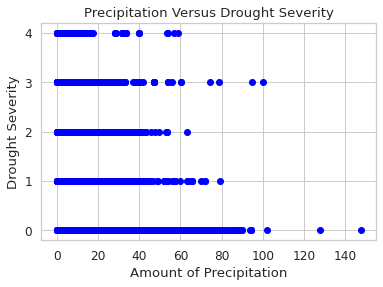

In [ ]:
#Plot the Level of Drought Severity Against the Amount of Precipitation
x = drought_df.PRECTOT
y = drought_df.score
plt.title('Precipitation Versus Drought Severity')
plt.xlabel('Amount of Precipitation')
plt.ylabel('Drought Severity')
plt.plot(x, y, 'o', color='blue');

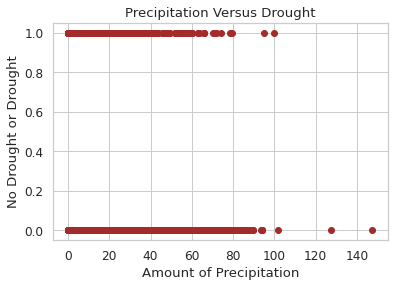

In [ ]:
#Plot No Drought and Drought Against the Amount of Precipitation
x = drought_df.PRECTOT
y = drought_df.drought
plt.title('Precipitation Versus Drought')
plt.xlabel('Amount of Precipitation')
plt.ylabel('No Drought or Drought')
plt.plot(x, y, 'o', color='brown');

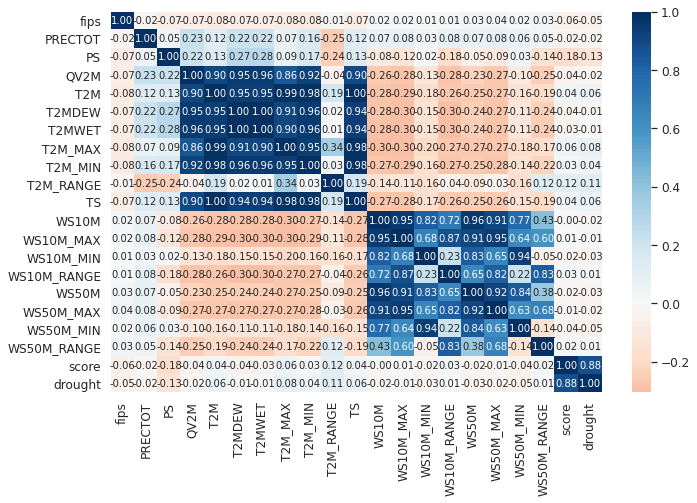

In [ ]:
#Declare Variable for Correlation Dataframe
corr = drought_df.corr()
#Visualize the Dataframe Using Seaborn Package With Correlation Matrix
fig, ax=plt.subplots()
fig.set_size_inches(11,7)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)
plt.show()

In [ ]:
#Determine Numerical and Categorical Features
numerical_features = drought_df.select_dtypes(include=['int64','float64']).columns
categorical_features = drought_df.select_dtypes(include=['object']).columns

In [ ]:
#Determine Numerical Index Features
numerical_features

Index(['fips', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET', 'T2M_MAX',
       'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX', 'WS10M_MIN',
       'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN', 'WS50M_RANGE',
       'score', 'drought'],
      dtype='object')

In [ ]:
#Determine Categorical Index Features
categorical_features

Index(['date'], dtype='object')

In [ ]:
#Import and Create a Preprocessing Piplines Numerical Features
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numeric_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy= 'mean')),
                                      ('scaler', MinMaxScaler())
])

In [ ]:
#Create a Preprocessing Piplines Categorical Features
categorical_transformer = Pipeline(steps=[
                                      ('imputer', SimpleImputer(strategy= "most_frequent" ))
])

In [ ]:
#Fit Numerical Features
#Fitting Will Take a Couple of Minutes to Execute
numeric_transformer.fit_transform(drought_df[numerical_features])

array([[0.00000000e+00, 1.52480347e-02, 9.10186199e-01, ...,
        1.00806452e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 3.38845216e-04, 9.11829135e-01, ...,
        1.03942652e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 9.25520263e-01, ...,
        5.46594982e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 7.65790187e-03, 4.17031763e-01, ...,
        4.92831541e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 6.77690431e-05, 4.43866375e-01, ...,
        1.92204301e-01, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.93819463e-02, 4.23603505e-01, ...,
        2.68369176e-01, 5.00000000e-01, 1.00000000e+00]])

In [ ]:
#Fit Categorical Features
#Fitting Will Take a Couple of Minutes to Execute
categorical_transformer.fit_transform(drought_df[categorical_features])

array([['2019-01-01'],
       ['2019-01-08'],
       ['2019-01-15'],
       ...,
       ['2020-06-16'],
       ['2020-06-23'],
       ['2020-06-30']], dtype=object)

In [ ]:
#Apply Column Transformer to Preprocessor and Display the Preprocessor
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('numeric',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('scaler',
                                                  MinMaxScaler(copy=True,
                                                               feature_range=(0,
                           

In [ ]:
#Fit the Preprocessor and Display the Transfromed Data
#Fitting Will Take a Couple of Minutes to Execute
transformed_data = preprocessor.fit_transform(drought_df)
transformed_data

array([[0.0, 0.015248034697750067, 0.9101861993428257, ..., 0.0, 0.0,
        '2019-01-01'],
       [0.0, 0.0003388452155055571, 0.9118291347207008, ..., 0.0, 0.0,
        '2019-01-08'],
       [0.0, 0.0, 0.9255202628696599, ..., 0.0, 0.0, '2019-01-15'],
       ...,
       [1.0, 0.007657901870425588, 0.4170317634173055, ..., 0.5, 1.0,
        '2020-06-16'],
       [1.0, 6.77690431011114e-05, 0.44386637458926614, ..., 0.5, 1.0,
        '2020-06-23'],
       [1.0, 0.01938194632691786, 0.42360350492880583, ..., 0.5, 1.0,
        '2020-06-30']], dtype=object)

In [ ]:
#Define the Column Name Function
def extract_feature_names(columnTransformerProcessor):
    output_features = []
    for name, pipe, features in columnTransformerProcessor.transformers_:
        if name!='remainder':
            for i in pipe:
                trans_features = []
                if hasattr(i,'categories_'):
                    trans_features.extend(i.get_feature_names(features))
                else:
                    trans_features = features
            output_features.extend(trans_features)
    return output_features

In [ ]:
#Display the Column Names
extract_feature_names(preprocessor)

['fips',
 'PRECTOT',
 'PS',
 'QV2M',
 'T2M',
 'T2MDEW',
 'T2MWET',
 'T2M_MAX',
 'T2M_MIN',
 'T2M_RANGE',
 'TS',
 'WS10M',
 'WS10M_MAX',
 'WS10M_MIN',
 'WS10M_RANGE',
 'WS50M',
 'WS50M_MAX',
 'WS50M_MIN',
 'WS50M_RANGE',
 'score',
 'drought',
 'date']

In [ ]:
#Extract Columns Names to the Normalized Data
transformed_data_df = pd.DataFrame(transformed_data, columns=extract_feature_names(preprocessor))
transformed_data_df

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,drought,date
0,0,0.015248,0.910186,0.440647,0.673116,0.796127,0.786819,0.610792,0.721025,0.241538,0.650574,0.0510204,0.0341253,0.0557123,0.0238727,0.111903,0.0997452,0.0723104,0.100806,0,0,2019-01-01
1,0,0.000338845,0.911829,0.397229,0.65186,0.77227,0.761758,0.64632,0.699755,0.403846,0.630179,0.123087,0.116199,0.118477,0.0774536,0.243006,0.190754,0.215755,0.103943,0,0,2019-01-08
2,0,0,0.92552,0.179677,0.525957,0.600775,0.582425,0.504207,0.586038,0.315385,0.512198,0.0848214,0.0730022,0.0959097,0.0413793,0.141525,0.104114,0.140506,0.0546595,0,0,2019-01-15
3,0,0.000203307,0.927437,0.222171,0.554844,0.645236,0.616924,0.544677,0.549905,0.533846,0.540209,0.209184,0.166739,0.175599,0.0960212,0.326385,0.26538,0.294533,0.135305,0,0,2019-01-22
4,0,0.0392383,0.906079,0.16351,0.503066,0.579861,0.550041,0.476559,0.501364,0.474615,0.489867,0.172194,0.164579,0.120592,0.135279,0.269885,0.207135,0.21164,0.126344,0,0,2019-01-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243066,1,0.00223638,0.445509,0.174134,0.59177,0.55306,0.530024,0.569387,0.613853,0.424615,0.578288,0.295918,0.390929,0.0860367,0.439257,0.33571,0.381507,0.0975897,0.428315,0,0,2020-04-28
243067,1,0.00223638,0.443866,0.389838,0.730481,0.725639,0.712612,0.700681,0.742023,0.441154,0.724926,0.132015,0.137365,0.117066,0.104509,0.165661,0.228977,0.10876,0.232079,0.25,1,2020-06-02
243068,1,0.0076579,0.417032,0.290993,0.71304,0.65701,0.640033,0.729798,0.72348,0.577308,0.691493,0.267219,0.447084,0.0811001,0.512467,0.314317,0.445213,0.115814,0.492832,0.5,1,2020-06-16
243069,1,6.7769e-05,0.443866,0.323788,0.75855,0.682727,0.668674,0.767063,0.72198,0.688846,0.763005,0.109056,0.10324,0.0825106,0.0885942,0.141525,0.173644,0.0717225,0.192204,0.5,1,2020-06-23


In [ ]:
#Separate Feature Variables and Target Variable
X = drought_df.drop(['fips','date','score', 'drought'], axis =1)
y = drought_df['drought']

In [ ]:
#Output the Proportion of no drought 222634 and drought 20437
y.value_counts()

0    222634
1     20437
Name: drought, dtype: int64

In [ ]:
#Output the Proportions of no drought 92% and drought 8%
y.value_counts(1)

0    0.915922
1    0.084078
Name: drought, dtype: float64

In [ ]:
# Normalize Features 
#Fitting Will Take a Couple of Minutes to Execute
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [ ]:
#Split Data to Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#Create Dummy Classifier With Most Frequent and Show Classifier Performance of 92%
#Fitting Will Take a Couple of Minutes to Execute
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent',random_state=0)
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(y_test)
dummy.score(X_test, y_test)

0.9174048983845753

### **Decision Tree (DT)**

In [ ]:
#Fine Tune The Decision Tree Parameter With GridSearch.
from sklearn.model_selection import GridSearchCV
param_dist_grid = {
    'min_samples_leaf' : range(1,10,2),
    'max_depth': range(1,10,2),
    'criterion'  :  ['gini', 'entropy']}

In [ ]:
#Illustrate the Decision Tree Classifier Method
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf =  GridSearchCV(clf_tree,param_dist_grid)

In [ ]:
#Fit CLF Model to Train Data
#Fitting Will Take a Couple of Minutes to Execute
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [ ]:
#Show The Optimal Parameters
clf.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 5}

In [ ]:
#Present The Performance Metric Best Score
clf.best_score_

0.9194999718784052

In [ ]:
#Display The Estimator Variable
dt_model_best = clf.best_estimator_
print(dt_model_best)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#Predict The Use of the Test Data On The Optimal Parameters
y_pred_best = dt_model_best.predict(X_test)

In [ ]:
#Display The Classification Report Metric of the New Data
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     66899
           1       0.60      0.14      0.23      6023

    accuracy                           0.92     72922
   macro avg       0.76      0.57      0.59     72922
weighted avg       0.90      0.92      0.90     72922



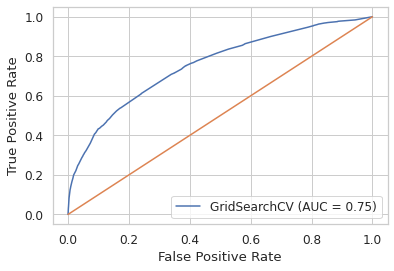

In [ ]:
#Create ROC Curve and Display AUC Value
from sklearn import metrics 
metrics.plot_roc_curve(clf, X_test, y_test)
plt.plot([0,1],[0,1])

### **Check Over-Fitting Post Tuning**

In [ ]:
#Predict for Both Training and Testing Data
tree_predicted_test   = dt_model_best.predict(X_test)
tree_predicted_train  = dt_model_best.predict(X_train)

In [ ]:
#Show Accuracy Score for Both Training and Testing Data
print('The Training accuracy Score is', metrics.accuracy_score(tree_predicted_train, y_train))
print('The Testing accuracy Score is', metrics.accuracy_score(tree_predicted_test, y_test))

The Training accuracy Score is 0.9243545363181682
The Testing accuracy Score is 0.9210800581443186


### *Feature Importance*

In [ ]:
#Copy the Columns Name to Features
features = ['PRECTOT',	'PS',	'QV2M',	'T2M',	'T2MDEW',	'T2MWET',	'T2M_MAX',	'T2M_MIN',	'T2M_RANGE',	'TS',	'WS10M',	'WS10M_MAX',	'WS10M_MIN',	'WS10M_RANGE',	'WS50M',	'WS50M_MAX',	'WS50M_MIN',	'WS50M_RANGE']

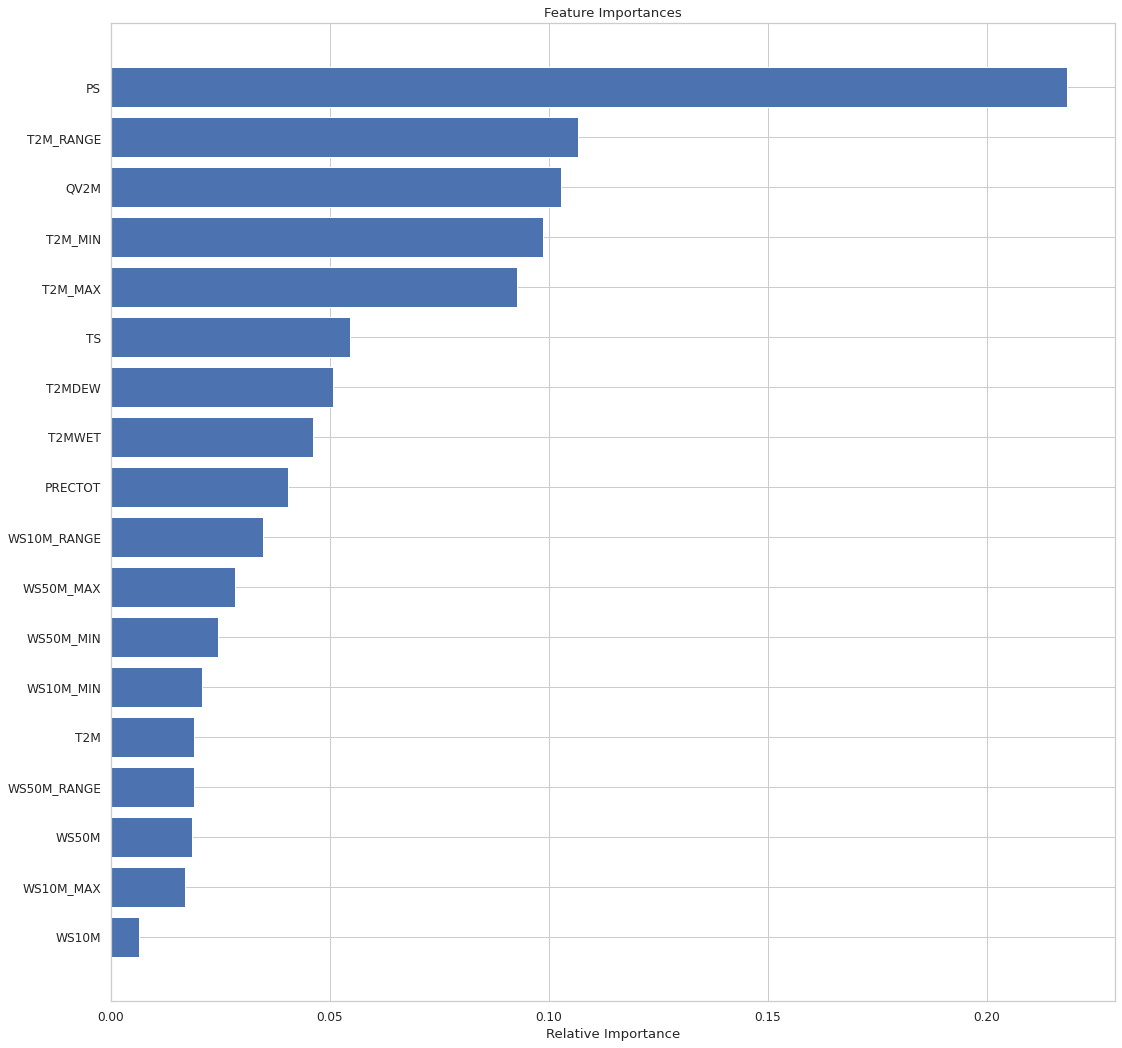

In [ ]:
#Visualize The Importances of The Top Most Important Features
importances = dt_model_best.feature_importances_
indices = np.argsort(importances)
#Customized Number of Features
num_features = 18
plt.figure(figsize=(18,18))
plt.title('Feature Importances')
#Plot the Customized Number of Features
plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
#List The Importances of The Top Most Important Features
for importance, name in sorted(zip(dt_model_best.feature_importances_, features),reverse=True):
   print (name, importance)

PS 0.21835833860927972
T2M_RANGE 0.1066309926531068
QV2M 0.10286684430144587
T2M_MIN 0.09870529654977554
T2M_MAX 0.09263934683687709
TS 0.0545411073515591
T2MDEW 0.05076153395234806
T2MWET 0.04627107940062385
PRECTOT 0.04057810781795468
WS10M_RANGE 0.03481393114013916
WS50M_MAX 0.028418862343699103
WS50M_MIN 0.02438852384476413
WS10M_MIN 0.020879856160036146
T2M 0.0190363055395839
WS50M_RANGE 0.019026427661431172
WS50M 0.018668008336272857
WS10M_MAX 0.016921576900674973
WS10M 0.006493860600427746


### *K-Nearest Neighbors (KNN)*

In [ ]:
#Construct the Number of Neighbors Performance
from sklearn import neighbors
nbrs = 3
knn = neighbors.KNeighborsClassifier(n_neighbors=nbrs)

In [ ]:
#Illustrate the KNN
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Fit KNN Model to Train Data
#Fitting Will Take a Couple of Minutes to Execute
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
#Predict The Use of the Test Data On The Optimal Parameters
y_pred_knn = knn.predict(X_test)

In [ ]:
#Display The Classification Report Metric of the K-Nearest Neighbors
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     66899
           1       0.73      0.52      0.61      6023

    accuracy                           0.95     72922
   macro avg       0.85      0.75      0.79     72922
weighted avg       0.94      0.95      0.94     72922



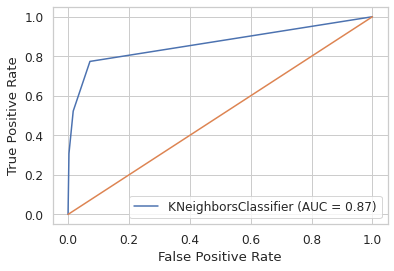

In [ ]:
#Create ROC Curve and Display AUC Value
metrics.plot_roc_curve(knn, X_test, y_test)
plt.plot([0,1],[0,1])

### *Logistic Regression (LR)*

In [ ]:
#Fine Tune The Logistic Regression Parameter With GridSearch.
from sklearn.linear_model import LogisticRegression  
clf_log = LogisticRegression()
grid_values = { 'penalty': ['l1', 'l2'],
                 'C' : [0.001, 0.009, 0.01, 0.09, 1, 3, 5 , 7, 10, 25, 50, 100]
                 }

In [ ]:
#Illustrate the Logistic Regression Classifier Method
clf_lr = GridSearchCV(clf_log, param_grid= grid_values, scoring= 'recall'  )

In [ ]:
#Fit CLF Model to Train Data
#Fitting Will Take a Couple of Minutes to Execute
clf_lr.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.009, 0.01, 0.09, 1, 3, 5, 7, 10, 25, 50,
                               100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [ ]:
#Predict The Use of the Test Data On The Optimal Parameters
y_pred_lr = clf_lr.predict(X_test)

In [ ]:
#Display The Classification Report Metric of the Logistic Regression
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     66899
           1       0.47      0.04      0.07      6023

    accuracy                           0.92     72922
   macro avg       0.69      0.52      0.51     72922
weighted avg       0.88      0.92      0.88     72922



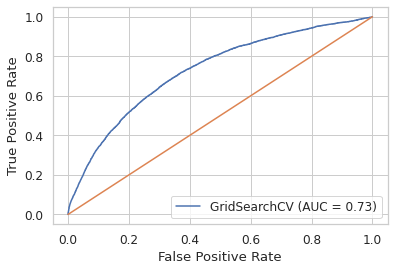

In [ ]:
#Create ROC Curve and Display AUC Value
metrics.plot_roc_curve(clf_lr, X_test, y_test)
plt.plot([0,1],[0,1])

### *Classification Model Evaluation for LR, KNN, and DT*

In [ ]:
#Define the Classification Model Evaluation for LR, KNN, and DT
def classification_model_evaluation(X,y,score):
    # scoring optioon: accuracy, f1_macro, precision_macro, recall_macro
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve,roc_auc_score,auc

    
    # import models
    import pandas
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=10, stratify =y)

    # load models
    seed = 1
    models = []
    models.append(('LR', LogisticRegression(C=100)))
    models.append(('KNN', KNeighborsClassifier(5)))
    models.append(('DT', DecisionTreeClassifier()))
    #models.append(('NB', GaussianNB()))
    #models.append(('SVM', SVC()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    #models.append(('RF',RandomForestClassifier()))
    
    results = []
    names = []
    models_summary = {}
    scoring = score
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        models_summary[name] = ([cv_results.mean(),cv_results.std()])
        

        cls = model.fit(X_train,y_train)
        yproba = cls.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
    
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
    
    models_summary_df = pd.DataFrame(models_summary,index=[str(score) + '_mean', str(score) + '_stdev'])

    #  model comparison boxplot
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Model Comparison \n Scoring: %s' %scoring)
    ax = fig.add_subplot(111)
    boxplot_results = pd.DataFrame(results, index=names)
    boxplot_results.assign(m=boxplot_results.mean(axis=1)).sort_values('m').drop('m', axis=1)
    
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.grid()
    plt.show()
    #print(results)
    

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(10,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.grid()
    plt.show()
    
    display(models_summary_df.head(2))

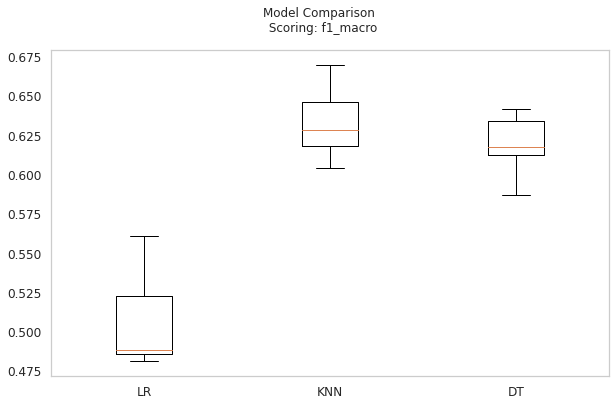

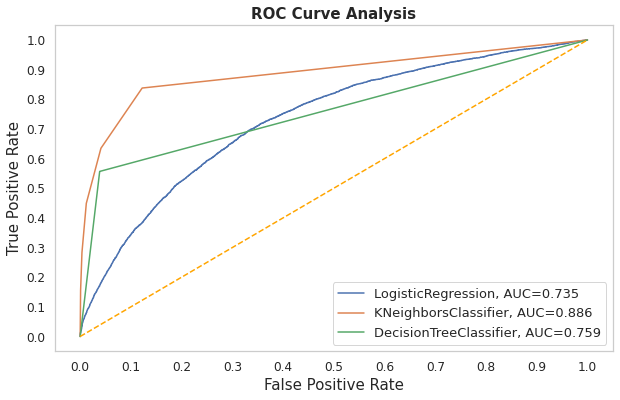

,LR,KNN,DT
f1_macro_mean,0.503964,0.632088,0.618880
f1_macro_stdev,0.027639,0.019441,0.017471


In [ ]:
#Display the Classification Model Evaluation for LR, KNN, and DT
#Function Will Take a Couple of Minutes to Execute
classification_model_evaluation(X, y, 'f1_macro')